In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU
import matplotlib.pyplot as plt


In [4]:
help(tf.keras.datasets)

Help on package keras.api.datasets in keras.api:

NAME
    keras.api.datasets - DO NOT EDIT.

DESCRIPTION
    This file was autogenerated. Do not edit it by hand,
    since your modifications would be overwritten.

PACKAGE CONTENTS
    boston_housing (package)
    california_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    /usr/local/lib/python3.11/dist-packages/keras/api/datasets/__init__.py




In [5]:
from tensorflow.keras.datasets import mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5

IMAGE PIXEL ARRAY: 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   

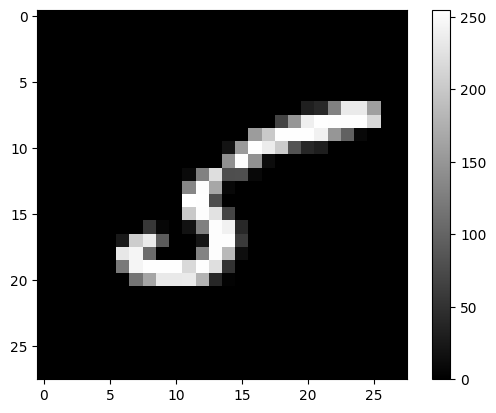

In [6]:
np.set_printoptions(linewidth=600)
print(train_label[11])
print(f'\nIMAGE PIXEL ARRAY: \n\n{train_img[11]}\n\n')
plt.imshow(train_img[11],cmap='gray')
plt.colorbar()
plt.show()

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
model=Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_img,train_label,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8883 - loss: 0.3887
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9693 - loss: 0.0983
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9804 - loss: 0.0615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9846 - loss: 0.0483
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9885 - loss: 0.0343
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0286
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9910 - loss: 0.0254
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9938 - loss: 0.0187
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9941 - loss: 0.0170
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9945 - loss: 0.0155


In [9]:
model.evaluate(test_img,test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.1262


[0.10008348524570465, 0.9782000184059143]

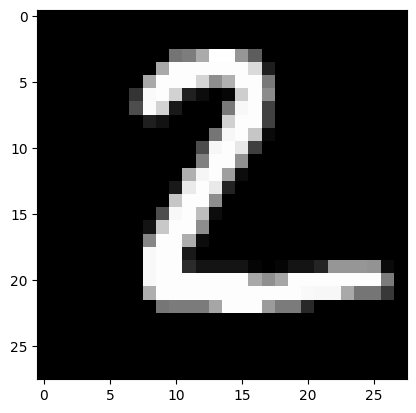

In [10]:
plt.imshow(test_img[1],cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


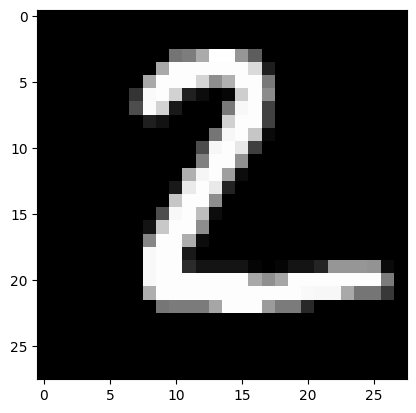

prediction=2 and actual = 2


In [11]:
#testing 1 image
i=test_img[1]
im=i.reshape(1,28,28)
classification = model.predict(im)
pred_label= np.argmax(classification[0])
plt.imshow(i,cmap='gray')
plt.show()
print(f'prediction={pred_label} and actual = {test_label[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


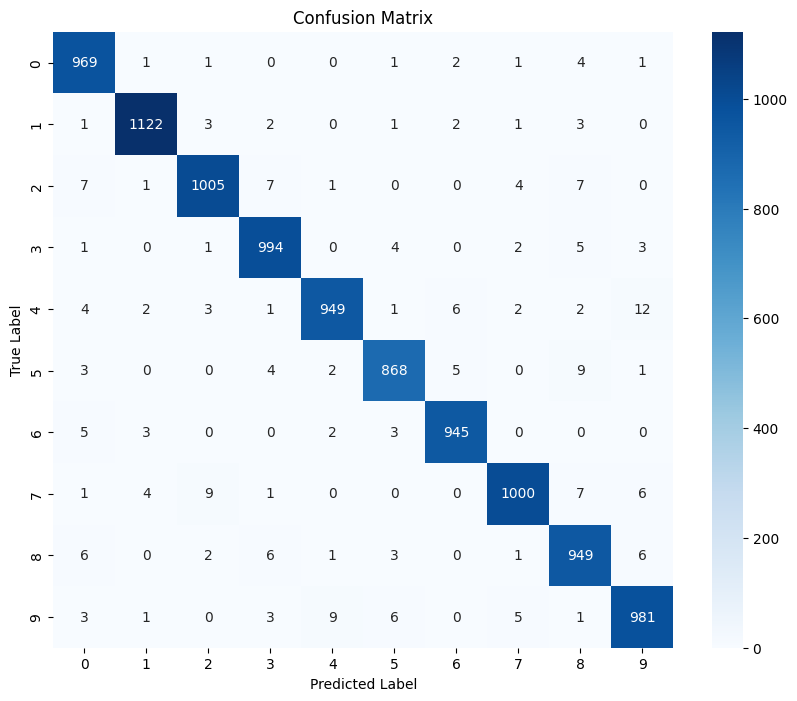

In [12]:
#for the entire batch no reshaping is needed, only for single image do we need to reshape to say (1,28,28),
# wherein 1 says its 1 image, in case of the test batch, 1 becomes the test_batch size and no reshaping is needed.

import seaborn as sns
y_pred = model.predict(test_img)
y_pred_labels = [np.argmax(i) for i in y_pred]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label,y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

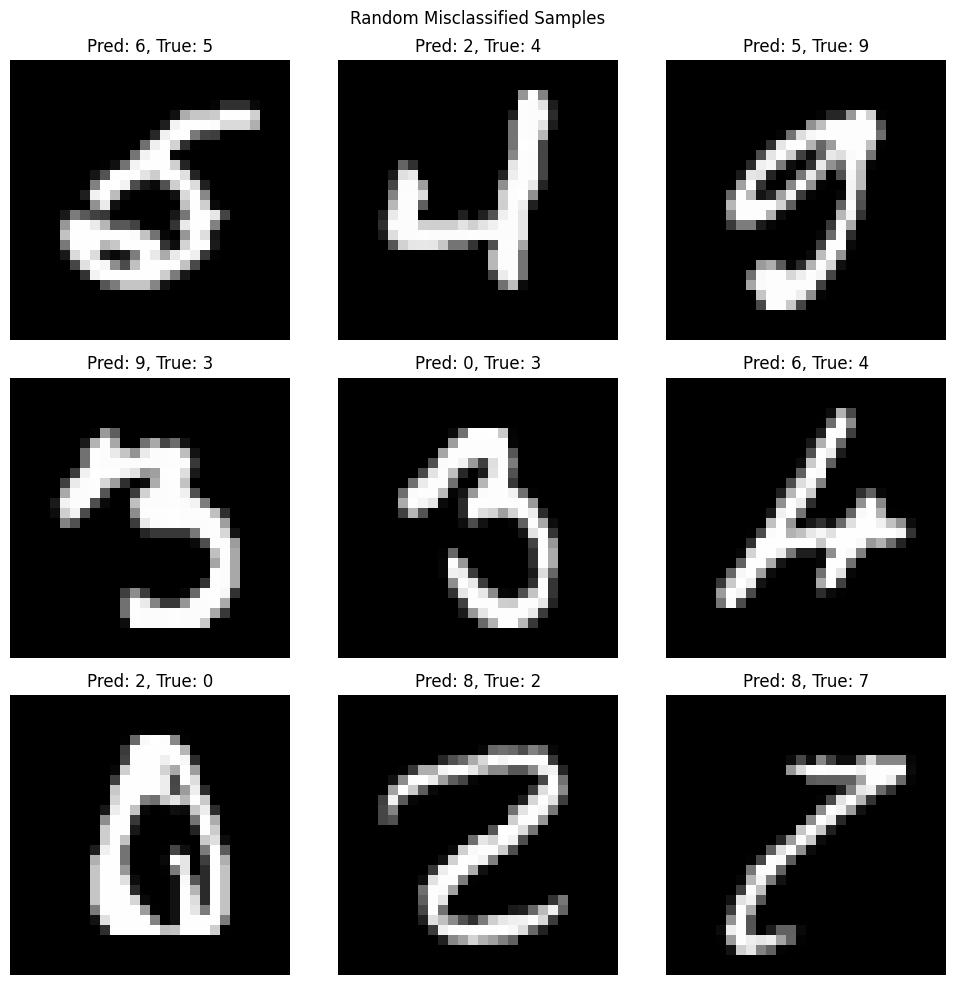

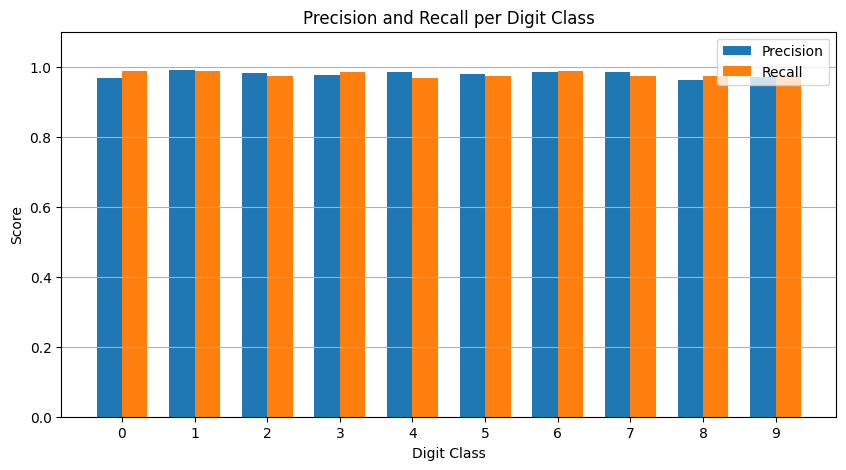

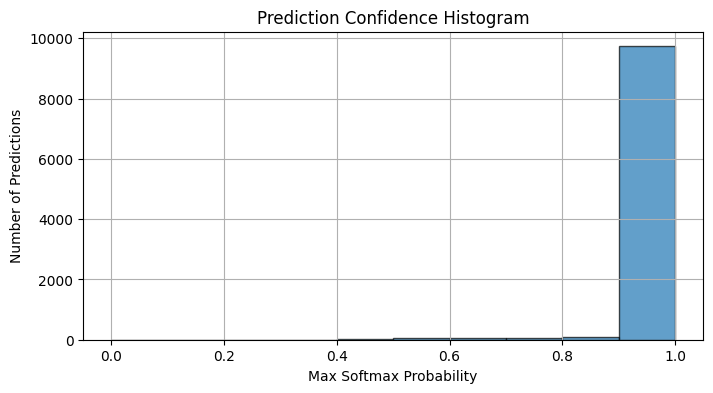

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# 1. Visualizing Misclassified Samples
misclassified_indices = [i for i, (p, t) in enumerate(zip(y_pred_labels, test_label)) if p != t]

plt.figure(figsize=(10, 10))
for i, index in enumerate(random.sample(misclassified_indices, 9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_img[index], cmap='gray')
    plt.title(f'Pred: {y_pred_labels[index]}, True: {test_label[index]}')
    plt.axis('off')
plt.suptitle('Random Misclassified Samples')
plt.tight_layout()
plt.show()

# 2. Class-wise Precision and Recall
precision, recall, fscore, support = precision_recall_fscore_support(test_label, y_pred_labels)

plt.figure(figsize=(10, 5))
x = np.arange(10)
bar_width = 0.35
plt.bar(x - bar_width/2, precision, width=bar_width, label='Precision')
plt.bar(x + bar_width/2, recall, width=bar_width, label='Recall')
plt.xlabel('Digit Class')
plt.ylabel('Score')
plt.title('Precision and Recall per Digit Class')
plt.xticks(x)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, axis='y')
plt.show()

# 3. Prediction Confidence Histogram
confidence_scores = [max(i) for i in y_pred]
plt.figure(figsize=(8, 4))
plt.hist(confidence_scores, bins=10, range=(0,1), edgecolor='black', alpha=0.7)
plt.title('Prediction Confidence Histogram')
plt.xlabel('Max Softmax Probability')
plt.ylabel('Number of Predictions')
plt.grid(True)
plt.show()


In [14]:
!git config --global user.email "arjunsnair271003@gmail.com"
!git config --global user.name "Arjun S Nair"

!git clone https://github.com/arjunsn-03/Deep-Learning-for-Handwritten-Digit-Recognition
%cd Deep-Learning-for-Handwritten-Digit-Recognition


Cloning into 'Deep-Learning-for-Handwritten-Digit-Recognition'...
/content/Deep-Learning-for-Handwritten-Digit-Recognition


In [16]:
import shutil
shutil.copy("Handwritten Digit classification using tf and mnist datset", "/content/Deep-Learning-for-Handwritten-Digit-Recognition/")


FileNotFoundError: [Errno 2] No such file or directory: 'Handwritten Digit classification using tf and mnist datset'